# Using the TFA toolbox

   Imports:

In [1]:
import datetime as dt
import swarmpal.toolboxes.tfa.tfa_processor as tfa

Provide values for the parameters of the analysis.  The `dataset` can be chosen from one of the compatible magnetic data collections, and the `var` is a VirES-compatible variable string (see [viresclient](https://viresclient.readthedocs.io/en/latest/available_parameters.html) for more information). The "start" and "end" times must be given as a datetime object. If the data are required as they are, set the `remove_chaos_model` parameter to False. Otherwise, if the inputs are magnetic field data and the analysis requires subtraction of the model field, set the parameter to True. 
For the HR product, remember to set the sampling_time to 0.02 seconds, i.e. 50 Hz rate.

In [18]:
dataset = "SW_OPER_MAGB_HR_1B"
series_dt = "PT0.02S"
var = 'B_NEC'
remove_chaos_model = True
time_start = dt.datetime(2015, 3, 14, 12, 5, 0)
time_end = dt.datetime(2015, 3, 14, 12, 30, 0)

Now run the TfaInput to retrieve the selected data.

In [19]:
inputs = tfa.TfaInput(collection = dataset, 
                start_time = time_start, end_time = time_end,
                initialise = True,
                varname=var, sampling_time = series_dt,
                remove_chaos=remove_chaos_model)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (11.137MB)

We can now use the full arsenal of functions to perform pre-processing of the data. If the selected variable is in vector form, we can convert it to its magnitude using the `calculate_magnitude()` function. This will generate a new variable named simply `B `. 

In [20]:
inputs.flag_cleaning()
inputs.subtract_chaos()
inputs.calculate_magnitude()

Now that the model field has been removed and the transformation has been performed, we can proceed to for Wavelet processing by initiating the `TfaProcessor` object and specifying the name of the variable.

In [21]:
processor = tfa.TfaProcessor(inputs, active_variable={"varname": "B"})

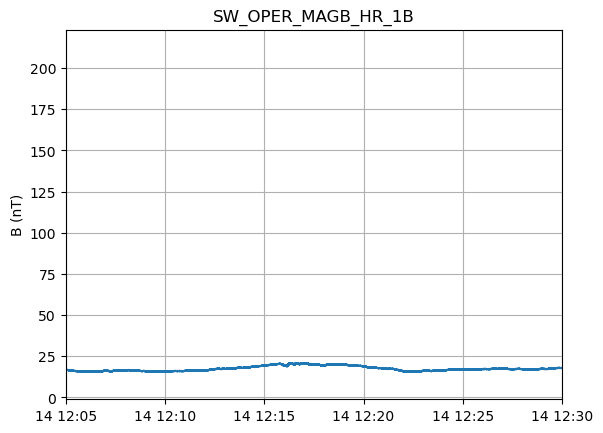

In [22]:
processor.plotX()

To perform cleaning on the data, we initialize a `Cleaning` object with the parameters of our choice and then apply it on the data with the `TfaProcessor` `apply()` function.
The active variable series can be plotted by means of the `plotX()` function.

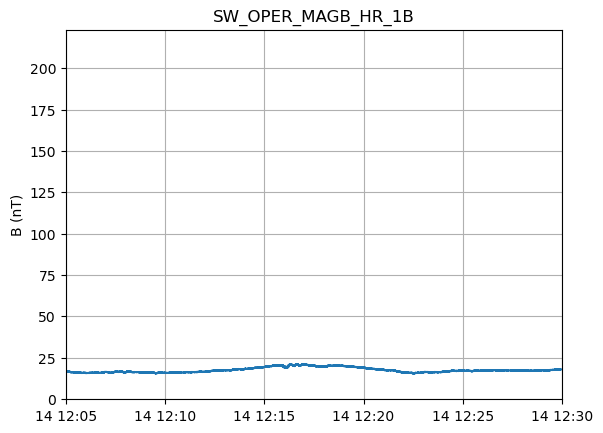

In [23]:
c = tfa.Cleaning({"Window_Size": 300, "Method": "iqr", "Multiplier": 1})
processor.apply(c)
processor.plotX()

Similarly, the filtering can be performed by first initializing a `Filtering` object with the parameters of our choosing and the applying in on the data.

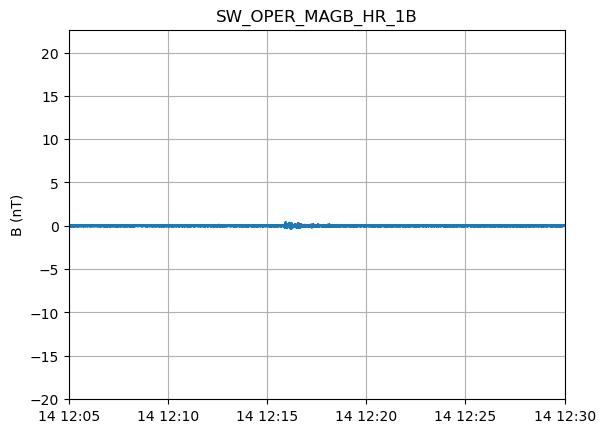

In [24]:
f = tfa.Filtering({"Sampling_Rate": 1/processor.input_data.SAMPLING_TIME, "Cutoff": 0.1})
processor.apply(f)
processor.plotX()

In the same way, the wavelet transform is applied. The result of the wavelet can be visualized by means of the image() function

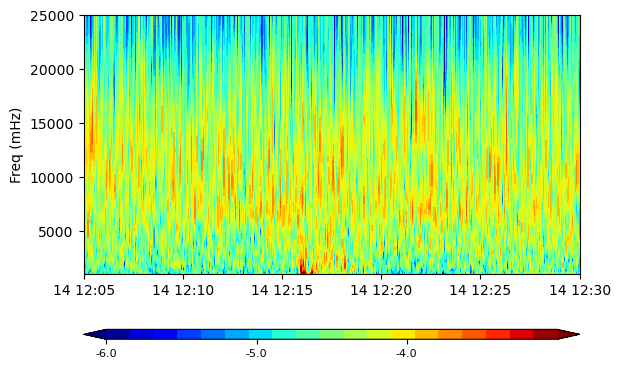

In [26]:
w = tfa.Wavelet({'Time_Step': processor.input_data.SAMPLING_TIME, 'Min_Scale': 1/25, 'Max_Scale': 1, 'dj': 0.1})
processor.apply(w)
processor.image(cbar_lims=[-6, -3])